In [59]:
from nilearn.plotting import plot_stat_map
import os
import numpy as np
import nibabel as nb
import matplotlib.pyplot as plt

In [ ]:
fsl_dir=os.environ['FSL_DIR']
mni152_brain=fsl_dir + '/data/standard/MNI152_T1_2mm_brain.nii.gz'

In [ ]:
contrasts = os.path.dirname(os.getcwd()) + '/contrasts/'
output_dir = os.path.dirname(os.getcwd()) + '/qc/'

files = []
for f in os.listdir(contrasts): 
    if '_mni152_sm08.nii.gz' in f:
        files.append(f)

## Plot active - sham contrast in [$^{18}$F]FDG-PET SUVR for each

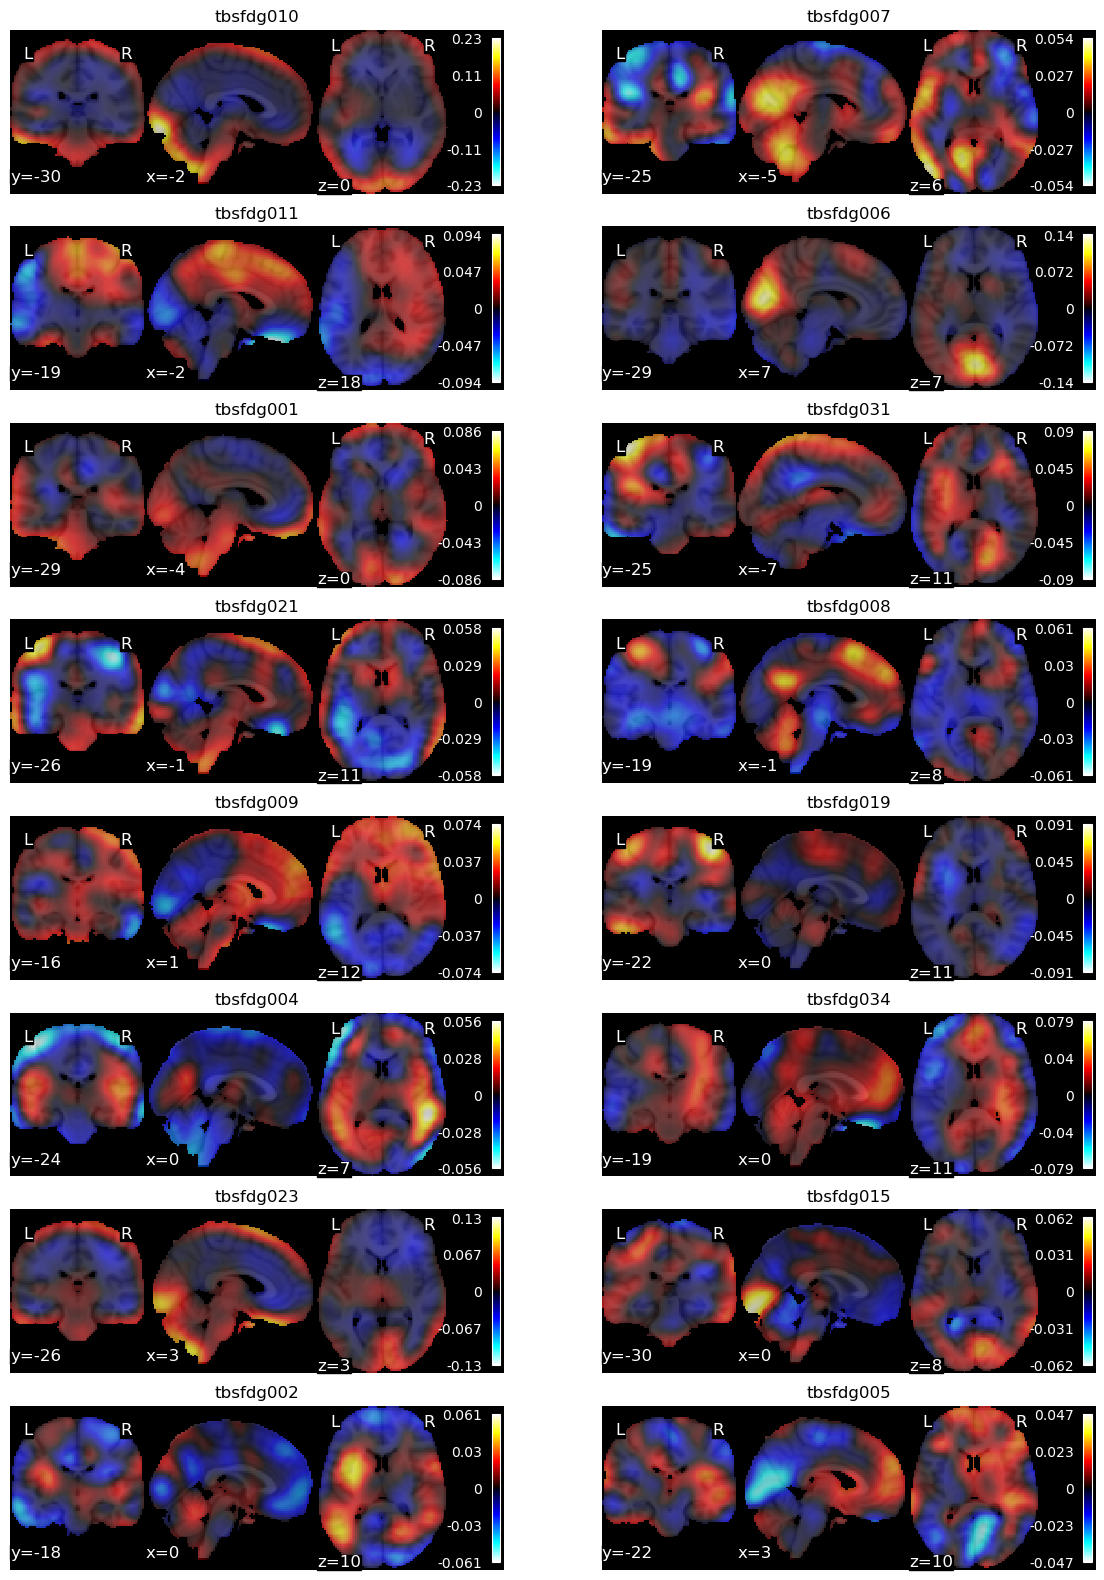

In [ ]:
mni152_mask=nb.load(fsl_dir + '/data/standard/MNI152_T1_2mm_brain_mask.nii.gz').get_fdata()
affine = nb.load(contrasts + files[0]).affine

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(14, 20))

for i, ax in enumerate(axes.flatten()):
    f=files[i]
    data = nb.load(contrasts + f).get_fdata()
    masked = data * mni152_mask
    img = nb.Nifti1Image(masked, affine)
    
    display = plot_stat_map(
        img,
        bg_img=mni152_brain,
        threshold=0,
        draw_cross=False,
        alpha = 0.6,
        axes=ax
    );
    
    ax.set_title(f.split('_')[0])
    
    
    

## Plot active - sham percentage difference in [$^{18}$F]FDG-PET SUVR for each

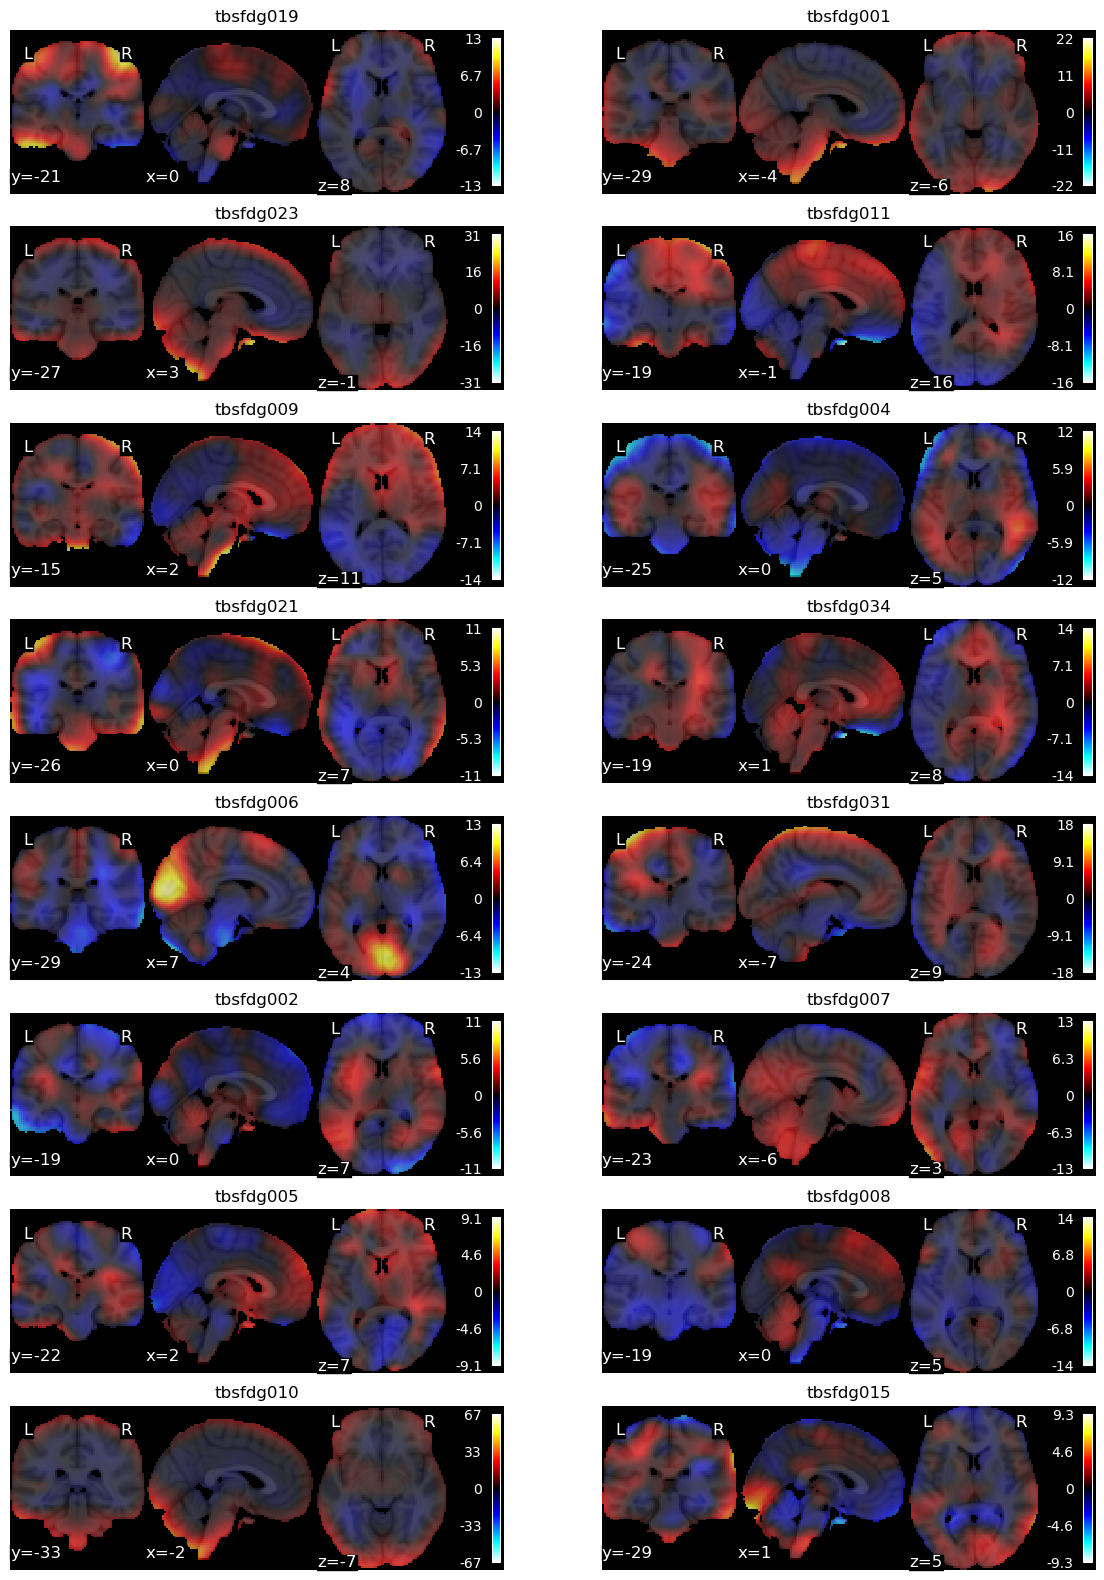

In [ ]:
files = []
for f in os.listdir(contrasts): 
    if '_perc_diff.nii.gz' in f:
        files.append(f)
        
mni152_mask=nb.load(fsl_dir + '/data/standard/MNI152_T1_2mm_brain_mask.nii.gz').get_fdata()
affine = nb.load(contrasts + files[0]).affine

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(14, 20))

for i, ax in enumerate(axes.flatten()):
    f=files[i]
    data = nb.load(contrasts + f).get_fdata()
    masked = data * mni152_mask
    img = nb.Nifti1Image(masked, affine)
    
    display = plot_stat_map(
        img,
        bg_img=mni152_brain,
        threshold=0,
        draw_cross=False,
        alpha = 0.6,
        axes=ax
    );
    
    ax.set_title(f.split('_')[0])
    